In [58]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [59]:
# importing Auto dataset
auto = pd.read_csv('Auto.csv')
auto = auto.drop(['name', 'origin'], axis=1)
auto = auto.dropna() # Dropping empty rows

Text(0.5, 1.0, 'Least square linear regression')

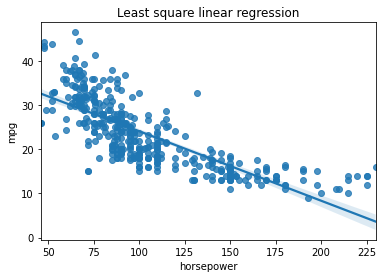

In [60]:
dt = auto[['horsepower','mpg']].copy() # creating copy of datset with mpg and horsepower only
sb.regplot(x='horsepower', y='mpg', data=dt) # plotting linear regression for horsepower as predictor and mpg as reponse
plt.title('Least square linear regression')

In [61]:
x = auto['horsepower'] # predictor
y = auto['mpg'] # response
X = sm.add_constant(x) # adding constant to model so it computes intercept

results = sm.OLS(y, X).fit() # fitting the model
print(results.summary()) # displaying summary of results

x_pred = X[X['horsepower'] == 98].to_numpy() # getting predictor equal to 98 from array
y_pred = results.predict(x_pred[0]) # predicting mpg
print("\nThe predicted mpg associated with a horsepower of 98 is", y_pred)

confidence_interval = results.conf_int(alpha=0.05).to_numpy() # extracting intercept and slope for confidence intervals
conf = np.transpose(confidence_interval)
tmp = conf[0][1]
con = [tmp, conf[0][0]]

conf_low = con[1] + con[0]*x_pred[0][1] # computing lower confidence

tmp = conf[1][0]
con = [conf[1][1], tmp]

conf_high = tmp + conf[1][1]*x_pred[0][1] # computing higher confidence
print("Confidence intervals are ", conf_low, conf_high)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           7.03e-81
Time:                        18:13:17   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

Text(0.5, 1.0, 'Residual vs Fitted')

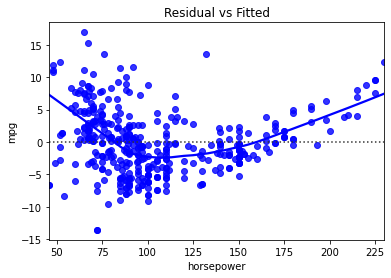

In [62]:
sb.residplot(x=x, y=y, lowess=True, color="b")
plt.title('Residual vs Fitted')

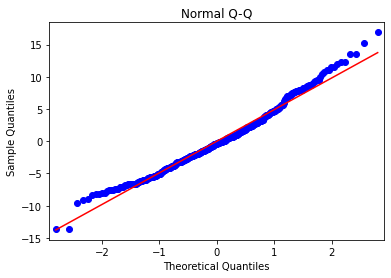

In [63]:
res = results.resid
sm.qqplot(res, line="r")
plt.title('Normal Q-Q')
plt.show()

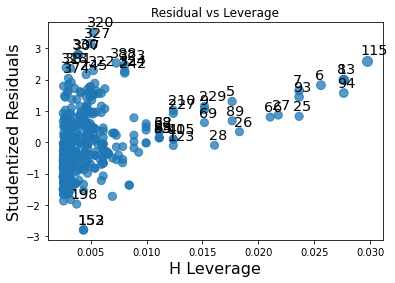

In [64]:
sm.graphics.influence_plot(results, size=10)
plt.title('Residual vs Leverage')
plt.show()

Text(0, 0.5, 'Standardized residuals')

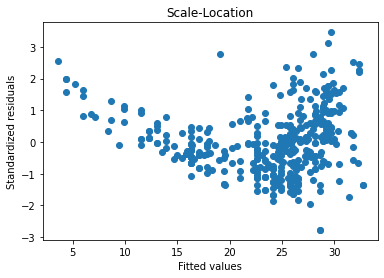

In [65]:
influence = results.get_influence()
standardized_residuals = influence.resid_studentized_internal # extracting standarized residual from the model
fitted = results.fittedvalues # extracting fitted values from fitted model
plt.scatter(fitted, standardized_residuals) # plotting to obtain standarized residuals vs fitted values
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')